In [1]:
import pandas as pd

x_train = pd.read_csv('CompleteDataset/x_train_all.csv')
y_train = pd.read_csv('CompleteDataset/y_train_all.csv')
x_test = pd.read_csv('CompleteDataset/x_test_all.csv')  
y_test = pd.read_csv('CompleteDataset/y_test_all.csv')

In [2]:
from sklearn.linear_model import LogisticRegression

# Despite the name logisticRegression is implemented as a linear model for classsification
linear_clf = LogisticRegression(random_state=0, solver="newton-cholesky")

In [3]:
from sklearn.metrics import accuracy_score

linear_clf.fit(x_train, y_train.to_numpy().ravel())
y_pred = linear_clf.predict_proba(x_test)
accuracy_score(y_test.to_numpy().ravel(), y_pred.ravel())

0.8537216828478964

In [4]:
accuracy_score(y_test.to_numpy().ravel(), y_pred.ravel())

0.8537216828478964

In [5]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# perfom (stratified) 10 fold cross validation
# stratifying accomodates class imbalances
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [6]:
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns
# from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, confusion_matrix
# from sklearn.preprocessing import label_binarize

# def cross_val_metrics(clf, input_data, labels):

#     labels = labels.to_numpy().ravel()

#     # Perform 10-fold cross-validation
#     cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#     cv_scores = cross_val_score(clf, input_data, labels, cv=cv, scoring='accuracy')

#     # Print the cross-validation scores, mean accuracy, and standard deviation
#     print("Cross-validation accuracy scores:", cv_scores)
#     print("Mean accuracy:", cv_scores.mean())
#     print("Standard deviation:", cv_scores.std())

#     # Get predicted labels for each fold
#     y_pred = cross_val_predict(clf, input_data, labels, cv=cv)

#     # Compute overall precision, recall, F1 score, and support
#     precision, recall, f1, support = precision_recall_fscore_support(labels, y_pred, average='macro')

#     # Print overall metrics
#     print("Overall Precision:", precision)
#     print("Overall Recall:", recall)
#     print("Overall F1 Score:", f1)

#     # Initialize variables to store overall metrics and confusion matrix
#     overall_conf_matrix = np.zeros((len(np.unique(labels)), len(np.unique(labels))))

#     # Loop over each fold
#     for i, (train_idx, test_idx) in enumerate(cv.split(input_data, labels)):
#         X_train, X_test = input_data.iloc[train_idx], input_data.iloc[test_idx]
#         y_train, y_test = labels.iloc[train_idx], labels.iloc[test_idx]

#         # Fit the classifier
#         clf.fit(X_train, y_train)

#         # Predict on the test set
#         y_fold_pred = clf.predict(X_test)

#         # Compute and plot confusion matrix
#         conf_matrix = confusion_matrix(y_test, y_fold_pred)
#         overall_conf_matrix += conf_matrix

#     # Calculate and print average confusion matrix
#     labels_annot = list(np.unique(np.array(labels)))
#     avg_conf_matrix = overall_conf_matrix / 10
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(avg_conf_matrix, annot=True, fmt=".2f", xticklabels=labels_annot, yticklabels=labels_annot)
#     plt.title("Average Confusion Matrix")
#     plt.xlabel("Predicted Labels")
#     plt.ylabel("Actual Labels")
#     plt.show()

#     X = input_data.values  # Convert DataFrame to NumPy array
#     y = labels.values  # Convert DataFrame to NumPy array

#     y_scores = np.zeros((len(y), len(np.unique(y))))

#     for train, test in cv.split(X, y):
#         clf.fit(X[train], y[train])
#         y_scores[test] = clf.predict_proba(X[test])

#     # Compute overall ROC-AUC score
#     roc_auc = roc_auc_score(label_binarize(y, classes=np.unique(y)), y_scores, average='macro')

#     # Print overall ROC-AUC score
#     print("Overall ROC-AUC:", roc_auc)

    


# def plot_learning_curve(input_data, labels):
#     dt_classifier = DecisionTreeClassifier()

#     train_sizes = np.linspace(0.1, 1.0, 10)
#     train_scores, val_scores = [], []

#     for size in train_sizes:
#         sample_size = int(len(input_data) * size)
#         train_score = np.mean(cross_val_score(dt_classifier, input_data[:sample_size], labels[:sample_size], cv=10))
#         train_scores.append(train_score)
#         val_score = np.mean(cross_val_score(dt_classifier, input_data, labels, cv=10))
#         val_scores.append(val_score)

#     plt.figure(figsize=(10, 6))
#     plt.plot(train_sizes * len(input_data), train_scores, 'o-', color="red", label="Training score")
#     plt.plot(train_sizes * len(input_data), val_scores, 'o-', color="green", label="Cross-validation score")

#     plt.title("Decision Tree Learning Curve")
#     plt.xlabel("Number of training examples")
#     plt.ylabel("Accuracy")
#     plt.legend(loc="best")
#     plt.show()

#     print("Average Training Score:", sum(train_scores)/10 )
#     print("Average Cross-Validation Score:",sum(val_scores)/10)


In [7]:
# cross_val_metrics(linear_clf, x_train, y_train)

Mean accuracy: 0.8981424148606811
Standard deviation: 0.011794090003987286


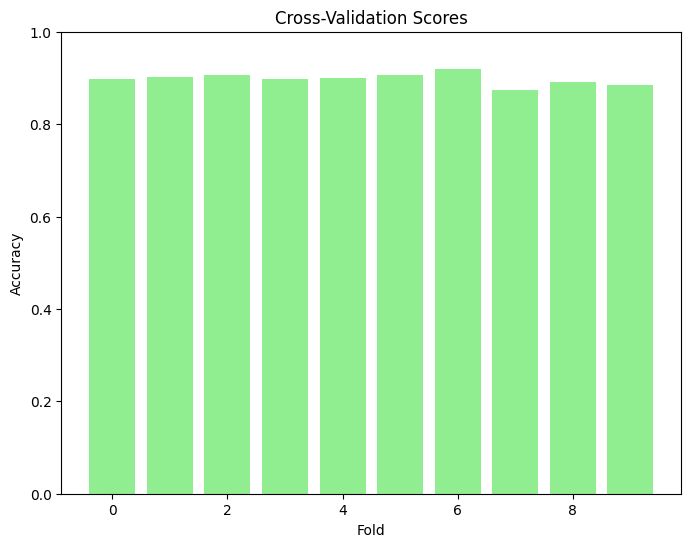

In [8]:
import matplotlib.pyplot as plt

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(linear_clf, x_train, y_train.to_numpy().ravel(), cv=cv, scoring='accuracy')

print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

# Plotting the cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(cv_scores)), cv_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim(0, 1)  # Set the y-axis limits if needed
plt.show()

The test set accuracy and cross-validation accuracy (??? and ??? respectively) are both high and very similar, indicating that the model is not over-fitting. The accuracy for each fold is very similat, with a standard deviation of only 0.029, indicting that the model can adapt well to new data

In [9]:
# cross_val_acc.mean()

In [10]:
from sklearn.neural_network import MLPClassifier

# experiment by changing:
# act func,
# no of layers,
# size of layers,
# learning rate,
# epochs,
# momentum,
# validation threshold

mlp_clf = MLPClassifier(random_state=42)

In [11]:
mlp_clf.fit(x_train, y_train)
y_pred = mlp_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

c:\Users\victo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7025889967637541
